In [223]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tools.hrf import create_hrf
from tools.glm import glm
from scipy.optimize import curve_fit
import nibabel as nib

from config import root
import os

%matplotlib inline

In [239]:
sub = 3
ses = 2
run = 1

In [241]:
# Get image
fname = "run_%03d_st_mcf_warp.nii.gz" % run
path = os.path.join(root, "data", "output", "applywarp")
path = os.path.join(path, "ses_%03dsub_%03d" % (ses, sub), "_applywarp%d" % run, fname)
img = nib.load(path)
d = img.get_data()

In [242]:
# Get behavior data
fname = "run_%03d_st_mcf_warp.nii.gz" % run
path = os.path.join(root, "data", "search")
path = os.path.join(path, "sub_%03d_ses_%03d_scn_%03d.txt" % (sub, ses, run))
df = pd.read_csv(path, 
                 names=["tr_nr", "isi", "cum_isi",
                        "cut_loc", "tgt_loc", "tgt_clr", "dis_clr",
                        "stim_onset", "stim_offset", 
                        "trigger", "rt"],
                 delimiter="\t")

triggers = df[df.trigger == "1"]
len(triggers)

201

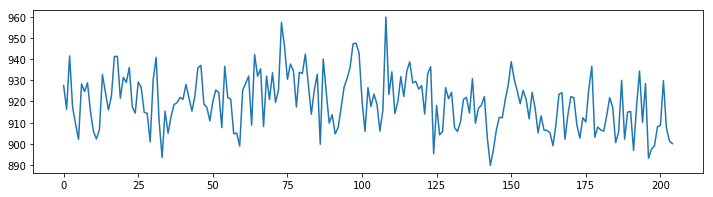

In [244]:
one_voxel = d[64, 64, 10, :]

plt.figure(figsize=(12, 3))
plt.plot(one_voxel)

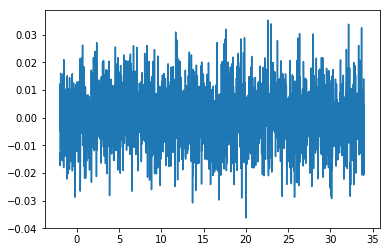

In [193]:
TR = 2.1
nscans = 138
hrf_props = {
    "time_unit" : TR/nscans,
    "response_delay" : 6.0,
    "undershoot_delay" : 16.0,
    "response_dispersion" : 1.0,
    "undershoot_dispersion" : 1.0,
    "resp_undershoot_ratio" : 6.0,
    "onset" : 0.0,
    "kernel_length" : 34.0
}

ppvoxel = round(nscans * 34 / TR)
fps = round(1/(TR/nscans))

x = np.linspace(-2, 34, ppvoxel + 2*fps+1)
signal = np.concatenate((np.zeros(2*fps), create_hrf(**hrf_props)))

noise = np.random.randn(len(signal))
y = signal + noise*.01


# y = np.convolve(y, np.ones(28))

# y -= y.mean()
plt.plot(x, y)

In [194]:
round(1/(TR/nscans))

66

In [197]:
coefs = np.polynomial.polynomial.polyfit(x, y, 12)
fit = np.poly1d(coefs[::-1])

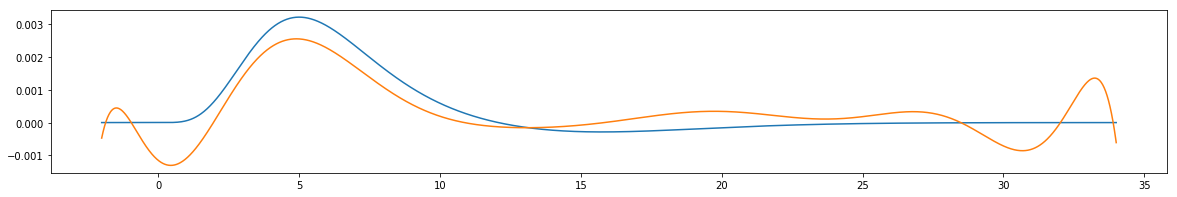

In [198]:
plt.figure(figsize=(20,3))
# plt.plot(x, y, ".")
plt.plot(x, signal)
plt.plot(extended_x, fit(extended_x))